In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
#Import the requests library 
import requests

#Import API key
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

#Build base URL for Open Weather API requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | constitucion
Processing Record 3 of Set 13 | airai
Processing Record 4 of Set 13 | cape town
Processing Record 5 of Set 13 | rawannawi
City not found. Skipping...
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | ambovombe
Processing Record 8 of Set 13 | upernavik
Processing Record 9 of Set 13 | hithadhoo
Processing Record 10 of Set 13 | mar del plata
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | butaritari
Processing Record 13 of Set 13 | hualmay
Processing Record 14 of Set 13 | matara
Processing Record 15 of Set 13 | east london
Processing Record 16 of Set 13 | omboue
Processing Record 17 of Set 13 | ribeira grande
Processing Record 18 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 13 | georgetown
Processing Record 20 of Set 13 | kapaa
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | talnakh
Processing R

Processing Record 37 of Set 16 | marawi
Processing Record 38 of Set 16 | kahului
Processing Record 39 of Set 16 | ushibuka
Processing Record 40 of Set 16 | hoshangabad
Processing Record 41 of Set 16 | souillac
Processing Record 42 of Set 16 | hay river
Processing Record 43 of Set 16 | longyearbyen
Processing Record 44 of Set 16 | huilong
Processing Record 45 of Set 16 | komsomolskiy
Processing Record 46 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 16 | alekseyevsk
Processing Record 48 of Set 16 | jiangkou
Processing Record 49 of Set 16 | tagusao
Processing Record 50 of Set 16 | esperance
Processing Record 1 of Set 17 | presidencia roque saenz pena
Processing Record 2 of Set 17 | mahebourg
Processing Record 3 of Set 17 | novyy urengoy
Processing Record 4 of Set 17 | lagunas
Processing Record 5 of Set 17 | gizo
Processing Record 6 of Set 17 | sitka
Processing Record 7 of Set 17 | vilhena
Processing Record 8 of Set 17 | marcona
City not found.

Processing Record 19 of Set 20 | caracoli
Processing Record 20 of Set 20 | lastoursville
Processing Record 21 of Set 20 | koshurnikovo
Processing Record 22 of Set 20 | urucara
Processing Record 23 of Set 20 | yeppoon
Processing Record 24 of Set 20 | geraldton
Processing Record 25 of Set 20 | bonthe
Processing Record 26 of Set 20 | nemuro
Processing Record 27 of Set 20 | mega
Processing Record 28 of Set 20 | yarmouth
Processing Record 29 of Set 20 | maceio
Processing Record 30 of Set 20 | santa cruz
Processing Record 31 of Set 20 | avera
Processing Record 32 of Set 20 | fredericksburg
Processing Record 33 of Set 20 | paita
Processing Record 34 of Set 20 | grand centre
City not found. Skipping...
Processing Record 35 of Set 20 | jonuta
Processing Record 36 of Set 20 | ahipara
Processing Record 37 of Set 20 | san fernando
Processing Record 38 of Set 20 | lichtenburg
Processing Record 39 of Set 20 | sorvag
City not found. Skipping...
Processing Record 40 of Set 20 | fukue
Processing Record

Processing Record 5 of Set 24 | paracuru
Processing Record 6 of Set 24 | san cristobal
Processing Record 7 of Set 24 | chapais
Processing Record 8 of Set 24 | aripuana
Processing Record 9 of Set 24 | marienburg
Processing Record 10 of Set 24 | mogadouro
Processing Record 11 of Set 24 | inderborskiy
City not found. Skipping...
Processing Record 12 of Set 24 | ituni
City not found. Skipping...
Processing Record 13 of Set 24 | tuyen quang
Processing Record 14 of Set 24 | penzance
Processing Record 15 of Set 24 | mnogovershinnyy
Processing Record 16 of Set 24 | djibo
Processing Record 17 of Set 24 | kutum
Processing Record 18 of Set 24 | basavakalyan
Processing Record 19 of Set 24 | haicheng
Processing Record 20 of Set 24 | katima mulilo
Processing Record 21 of Set 24 | fortuna
Processing Record 22 of Set 24 | axim
Processing Record 23 of Set 24 | roches noires
City not found. Skipping...
Processing Record 24 of Set 24 | uhlove
Processing Record 25 of Set 24 | port hedland
Processing Recor

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.33,74,0,13.24,PF,2021-01-22 21:51:25
1,Constitucion,-35.3333,-72.4167,66.58,68,17,6.08,CL,2021-01-22 21:52:30
2,Airai,-8.9266,125.4092,61.95,100,98,2.10,TL,2021-01-22 21:52:11
3,Cape Town,-33.9258,18.4232,72.00,94,20,12.66,ZA,2021-01-22 21:51:51
4,Busselton,-33.6500,115.3333,60.01,97,0,6.55,AU,2021-01-22 21:51:44
5,Ambovombe,-25.1667,46.0833,78.78,90,95,8.14,MG,2021-01-22 21:53:19
6,Upernavik,72.7868,-56.1549,18.86,83,8,5.28,GL,2021-01-22 21:47:46
7,Hithadhoo,-0.6000,73.0833,81.90,72,99,5.75,MV,2021-01-22 21:52:06
8,Mar Del Plata,-38.0023,-57.5575,78.80,69,0,16.11,AR,2021-01-22 21:49:12
9,Ushuaia,-54.8000,-68.3000,57.20,35,40,13.80,AR,2021-01-22 21:49:05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

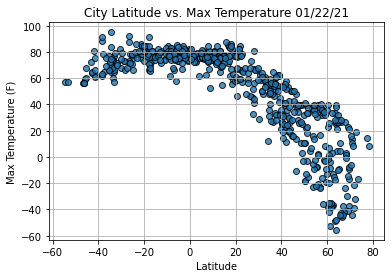

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

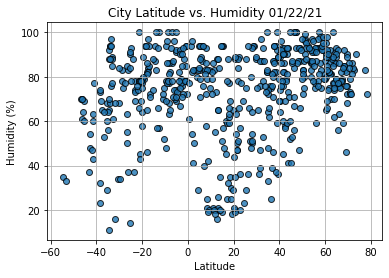

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

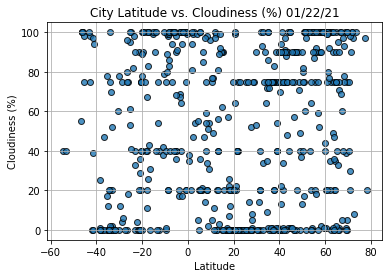

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

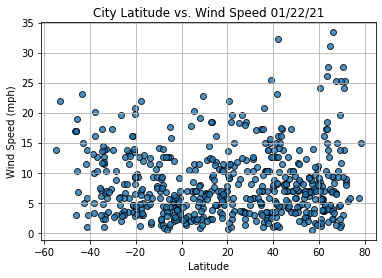

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

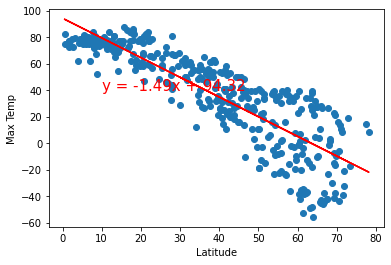

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

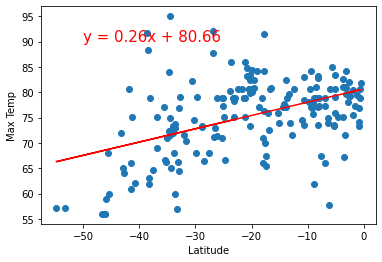

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

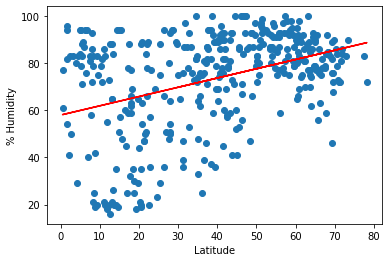

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

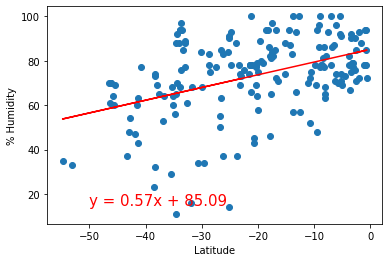

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

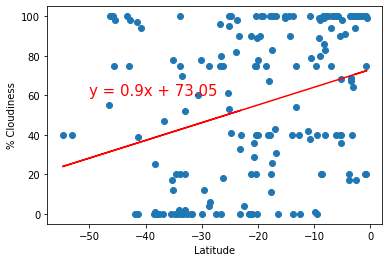

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

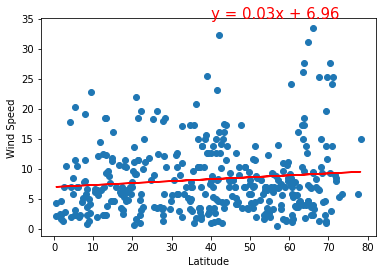

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

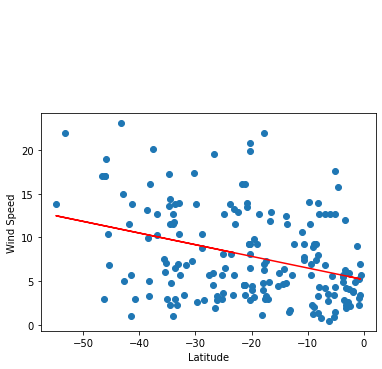

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))